In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from itertools import product
warnings.simplefilter('ignore')

sales=pd.read_csv("C:\\Users\\kp\\Pictures\\Assignments\\Forecasting\\CocaCola_Sales_Rawdata.csv",header=0)
sales.head(5)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


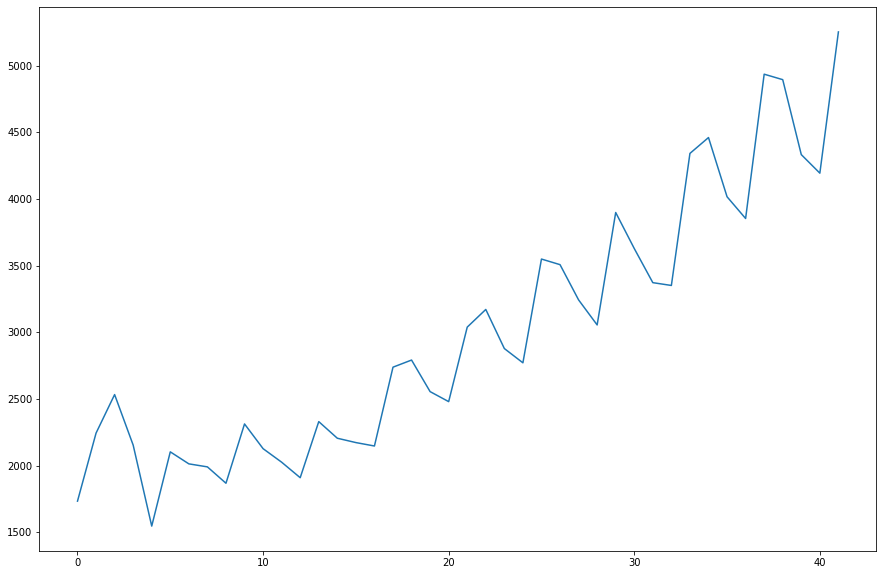

In [104]:
# Time Series plot
plt.figure(figsize=(15,10))
sales["Sales"].plot()
plt.show()

#The Time Series plot says that the Data has some Level,Increasing Trend and Multiplicative seasonality residing in it

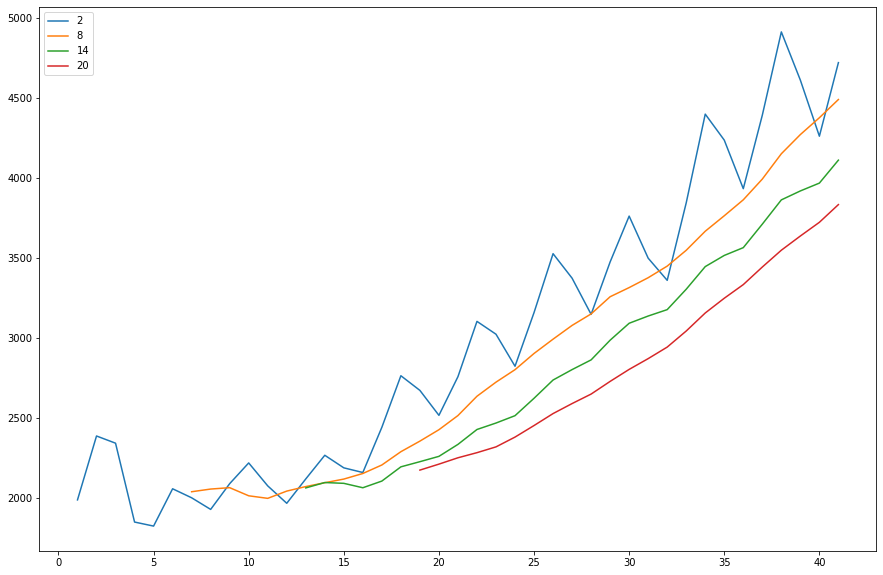

In [105]:
# #Dickey-Fuller Test to test the Stationarity of the Data

# dftest = adfuller(sales["Sales"], autolag='AIC')
# dftest_Summary = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

# for key,value in dftest[4].items():
#     dftest_Summary['Critical Value (%s)'%key] = value
# print(dftest_Summary)



# Moving average for the time series data with different windows

plt.figure(figsize=(15,10))
for i in range(2,24,6):
    sales["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

#The plot shows the increasing trend for various different windows and hence the time Series Data is said to be Non-Stationary

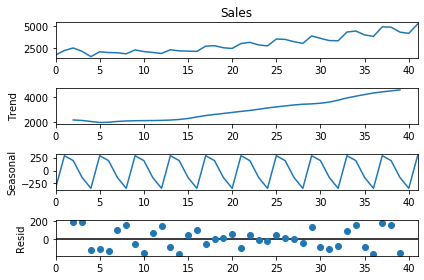

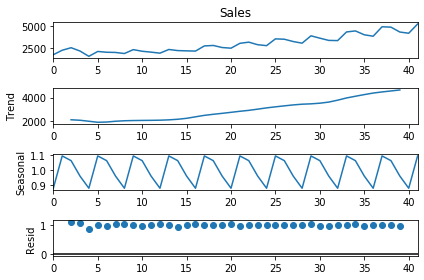

In [106]:
# Time series decomposition plots

decompose_ts_add = seasonal_decompose(sales["Sales"],model="additive",period=4)
decompose_ts_add.plot()
plt.show()

decompose_ts_mul = seasonal_decompose(sales["Sales"],model="multiplicative",period=4)
decompose_ts_mul.plot()
plt.show()

#From Seasonal Decompose plots it is evident that the time series data has got some Trend and Seasonality in it both for
#Additive and Multiplicative Models but the residuals/Noise for Multiplicative Model is Constant which would mean that 
#there's no noise after the removal of Trend and Seasonality from the time series data which concludes that the Time Series
#has Multiplicative Seasonality in it

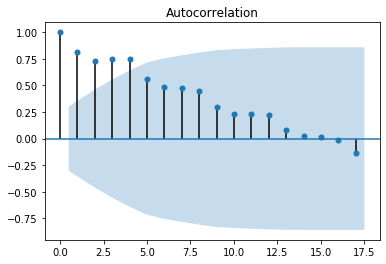

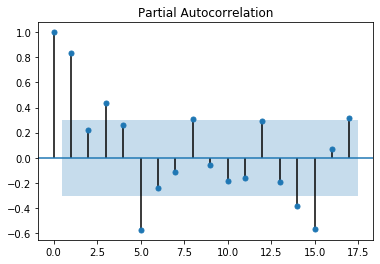

In [107]:
# ACF plots and PACF plots on Original data sets 

#ACF Plot
tsa_plots.plot_acf(sales["Sales"])
plt.show()

#PACF Plot
tsa_plots.plot_pacf(sales["Sales"])
plt.show()

In [108]:
# Splitting the data into Train and Test data and considering the last 6 Quarters data as Test data and left over data as Train data 

Train = sales.head(36)
Test = sales.tail(6)
model=[];mape=[]

# Simple Exponential Smoothing Method
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
mape_ses = np.mean(np.abs((Test["Sales"]-pred_ses) / Test["Sales"])) * 100
model.append("Simple Exponential");mape.append(mape_ses)
mape_ses

11.62675556389045

In [109]:
# Holts method / Double Exponential Smoothing Method

holt_model = Holt(Train["Sales"]).fit()
pred_holts = holt_model.predict(start = Test.index[0],end = Test.index[-1])
mape_holts = np.mean(np.abs((Test["Sales"]-pred_holts) / Test["Sales"])) * 100
model.append("Holts method / Double Exponential Smoothing Method");mape.append(mape_holts)
mape_holts

9.897141780274191

In [110]:
# Holts Winter Exponential Smoothing with Additive Seasonality and Additive Trend

hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="additive",trend="additive",seasonal_periods=4,damped=True).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
mape_hwe_add_add = np.mean(np.abs((Test["Sales"]-pred_hwe_add_add) / Test["Sales"])) * 100
model.append("Holts Winter Exponential Smoothing with Additive Seasonality and Additive Trend");mape.append(mape_hwe_add_add)
mape_hwe_add_add

3.6030759040734917

In [111]:
# Holts Winter Exponential Smoothing with Multiplicative Seasonality and Additive Trend

hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="multiplicative",trend="additive",seasonal_periods=4).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
mape_hwe_mul_add = np.mean(np.abs((Test["Sales"]-pred_hwe_mul_add) / Test["Sales"])) * 100
model.append("Holts Winter Exponential Smoothing with Multiplicative Seasonality and Additive Trend");mape.append(mape_hwe_mul_add)
mape_hwe_mul_add

3.6565733484156455

In [112]:
# Holts Winter Exponential Smoothing with Multiplicative Seasonality and Multiplicative Trend

hwe_model_mul_mul = ExponentialSmoothing(Train["Sales"],seasonal="multiplicative",trend="multiplicative",seasonal_periods=4).fit()
pred_hwe_mul_mul = hwe_model_mul_mul.predict(start = Test.index[0],end = Test.index[-1])
mape_hwe_mul_mul = np.mean(np.abs((Test["Sales"]-pred_hwe_mul_mul) / Test["Sales"])) * 100
model.append("Holts Winter Exponential Smoothing with Multiplicative Seasonality and Multiplicative Trend");mape.append(mape_hwe_mul_mul)
mape_hwe_mul_mul

1.4586803911182677

In [113]:
#ARIMA Model
#Searching for p,d,q(Order) and P,D,Q(Seasonal Order) values which best fits the model

# m =4 #Periodicity
# combinations_order = list(product([1,2,3,5,7,8],[0,1,2],[0,1,3,4,5]))
# combinations_sea_order = list(product([1,2,3,5,7,8],[0,1,2],[0,1,3,4,5]))

# sarima_results = []
# best_aic = float("inf")

# for i in combinations_order:
#     for j in combinations_sea_order:
#         try:
#             model_sarima = sm.tsa.statespace.SARIMAX(Train["Sales"],order = i,seasonal_order = j+(m,)).fit(disp=False)
#         except:
#             continue
#         aic = model_sarima.aic
#         if aic < best_aic:
#             best_model = model_sarima
#             best_aic = aic
#             best_order = i
#             best_sea_order = j
#         sarima_results.append([i,j,model_sarima.aic])


#From the Above Grid Search, the ARIMA Model with Order (3, 2, 0) and Seasonal Order (5, 2, 0, 4) performs good yielding 
#less MAPE Value Compared to other models and has less AIC(Goodness of FIT) value compared to other ARIMA models
#Hence these Order and Seasonal Order parameter values will be considered in final Model Building

In [114]:
#Choosing the best Order and Seasonal Order Parameters through above Grid Search in order to build BEST ARIMA Model 

best_arima_model = sm.tsa.statespace.SARIMAX(Train["Sales"],order = (3,2,0),seasonal_order = (5,2,0,4)).fit(disp=False)
print(best_arima_model.summary())
sarima_pred = best_arima_model.predict(start = Test.index[0],end = Test.index[-1])
sarima_mape = np.mean(np.abs((Test["Sales"]-sarima_pred) / Test["Sales"])) * 100
model.append("ARIMA Model");mape.append(sarima_mape)
sarima_mape

                                     SARIMAX Results                                     
Dep. Variable:                             Sales   No. Observations:                   36
Model:             SARIMAX(3, 2, 0)x(5, 2, 0, 4)   Log Likelihood                -171.859
Date:                           Sun, 17 May 2020   AIC                            361.719
Time:                                   07:59:02   BIC                            373.042
Sample:                                        0   HQIC                           364.979
                                            - 36                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8645      1.112     -0.777      0.437      -3.044       1.315
ar.L2         -0.9037      0.289     -3.124

4.4504224404644415

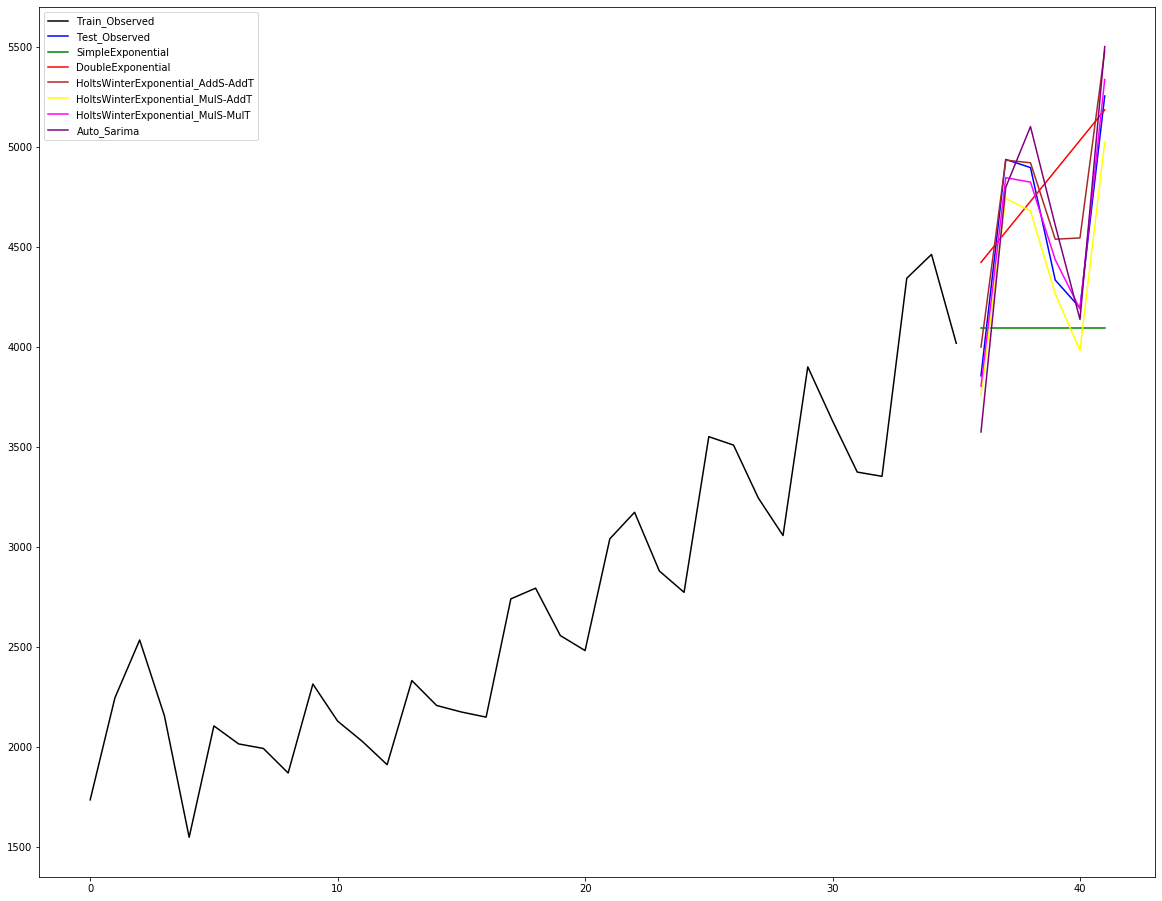

In [115]:
# Visualization of Forecasted values for Test data set using different methods

plt.figure(figsize=(20,16))
plt.plot(Train.index, Train["Sales"], label='Train_Observed',color="black")
plt.plot(Test.index, Test["Sales"], label='Test_Observed',color="blue")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
plt.plot(pred_holts.index, pred_holts, label='DoubleExponential',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_AddS-AddT",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_MulS-AddT",color="yellow")
plt.plot(pred_hwe_mul_mul.index,pred_hwe_mul_mul,label="HoltsWinterExponential_MulS-MulT",color="magenta")
plt.plot(sarima_pred.index,sarima_pred,label="Auto_Sarima",color="purple")
plt.legend(loc='best')
plt.show()

In [116]:
#Different Models Performance Table on Test Dataset

Performance_table = pd.DataFrame({"MODEL":pd.Series(model),"MAPE_Values(%)":pd.Series(mape)})
print(Performance_table)

#It is evident from the Performance Table that Holts Winter Exponential Smoothing with Multiplicative Seasonality and 
#Multiplicative Trend Model is the Best Fit which yields less error Compared to other Models prepared

                                               MODEL  MAPE_Values(%)
0                                 Simple Exponential       11.626756
1  Holts method / Double Exponential Smoothing Me...        9.897142
2  Holts Winter Exponential Smoothing with Additi...        3.603076
3  Holts Winter Exponential Smoothing with Multip...        3.656573
4  Holts Winter Exponential Smoothing with Multip...        1.458680
5                                        ARIMA Model        4.450422


In [117]:
#Training the model on the Entire Dataset by Choosing the Best Fit Model 
#- Holts Winter Exponential Smoothing with Multiplicative Seasonality and Multiplicative Trend Model

best_datadriven_model = ExponentialSmoothing(sales["Sales"],seasonal="multiplicative",trend="multiplicative",seasonal_periods=4).fit()
predictions = best_datadriven_model.predict(start = sales.index[0],end = sales.index[-1])
rmse_best_datadriven_model = np.sqrt(np.mean((sales["Sales"]-predictions)**2))
percentage_mean_error = np.mean(np.abs((sales["Sales"]-predictions) / sales["Sales"])) * 100
forecast_out_of_sample = best_datadriven_model.forecast(steps = 6)

print("RMSE Value for the Best Fit-Holts Winter Exponential Smoothing with Multiplicative Seasonality and Multiplicative Trend Model: ",rmse_best_datadriven_model)
print("MAPE Value for the Best Fit-Holts Winter Exponential Smoothing with Multiplicative Seasonality and Multiplicative Trend Model(%): ",percentage_mean_error)

RMSE Value for the Best Fit-Holts Winter Exponential Smoothing with Multiplicative Seasonality and Multiplicative Trend Model:  128.6465161584281
MAPE Value for the Best Fit-Holts Winter Exponential Smoothing with Multiplicative Seasonality and Multiplicative Trend Model(%):  3.518523064723943


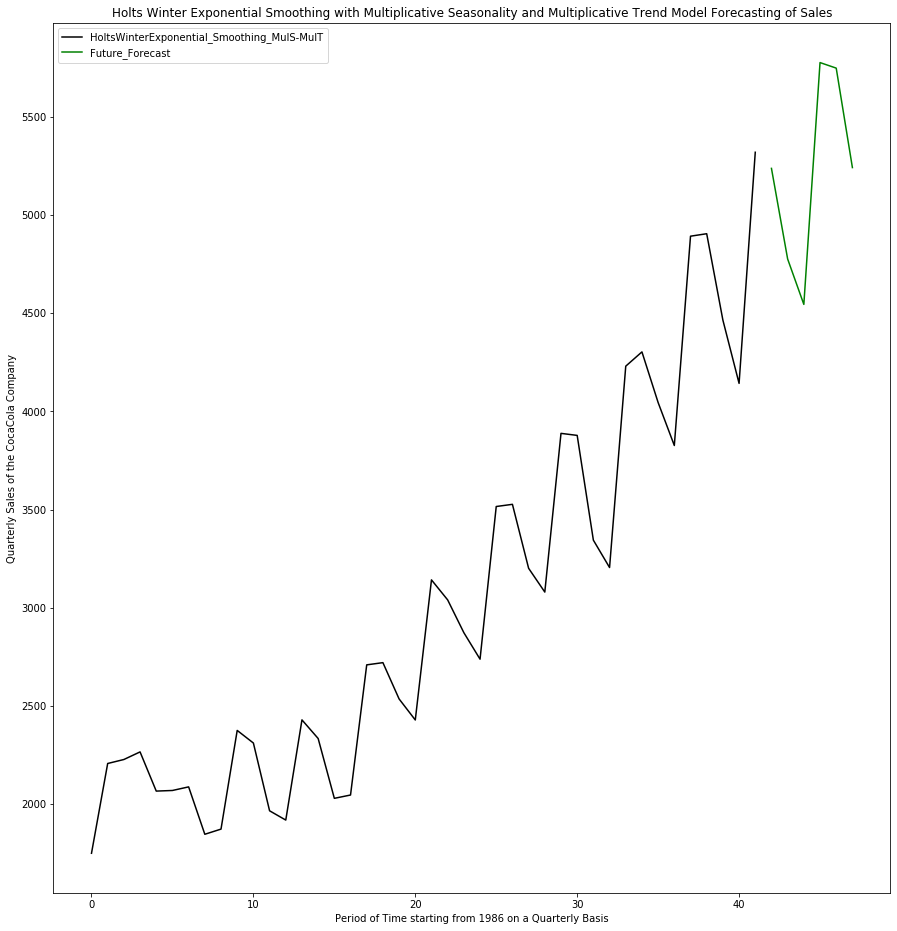

In [118]:
#Visualization of Forecasted values for Entire data set using Holts Winter Exponential Smoothing with Multiplicative Seasonality and Multiplicative Trend Model

plt.figure(figsize=(15,16))
plt.title('Holts Winter Exponential Smoothing with Multiplicative Seasonality and Multiplicative Trend Model Forecasting of Sales')
plt.plot(predictions.index, predictions, 'black', label = 'HoltsWinterExponential_Smoothing_MulS-MulT')
plt.plot(forecast_out_of_sample.index, forecast_out_of_sample, label='Future_Forecast',color="green")
plt.legend(loc = 'best')
plt.ylabel('Quarterly Sales of the CocaCola Company')
plt.xlabel('Period of Time starting from 1986 on a Quarterly Basis')
plt.show()